# Create visualizations using Matplotib, Seaborn and Folium

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import datetime as dt
import plotly.graph_objects as px
import seaborn as sns

In [2]:
data_auto=pd.read_csv('datasets/historical_automobile_sales.csv')
data_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     528 non-null    object 
 1   Year                     528 non-null    int64  
 2   Month                    528 non-null    object 
 3   Recession                528 non-null    int64  
 4   Consumer_Confidence      528 non-null    float64
 5   Seasonality_Weight       528 non-null    float64
 6   Price                    528 non-null    float64
 7   Advertising_Expenditure  528 non-null    int64  
 8   Competition              528 non-null    int64  
 9   GDP                      528 non-null    float64
 10  Growth_Rate              528 non-null    float64
 11  unemployment_rate        528 non-null    float64
 12  Automobile_Sales         528 non-null    float64
 13  Vehicle_Type             528 non-null    object 
 14  City                     5

# TASK 1.1: Develop a Line chart using the functionality of pandas to show how automobile sales fluctuate from year to year

Text(1982, 650, '1981-82 Recession')

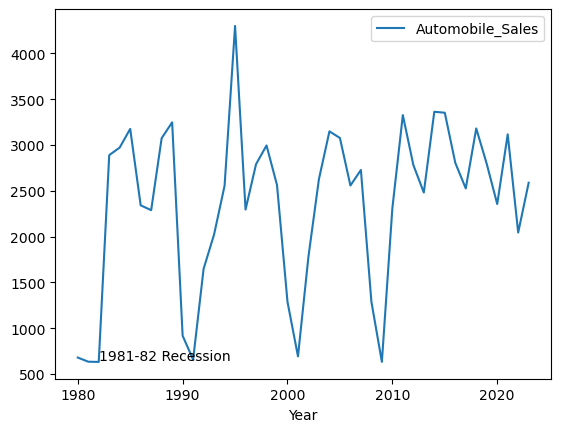

In [3]:
dt=data_auto.groupby('Year')['Automobile_Sales'].mean().reset_index()
dt.plot(kind='line',y='Automobile_Sales',x='Year')
# plt.xticks(list(range(1980,2024)),rotation=75)
plt.text(1982, 650, '1981-82 Recession')

####  TASK 1.2: Plot different lines for categories of vehicle type and analyse the trend to answer the question Is there a noticeable difference in sales trends between different vehicle types during recession periods?

(array([-25.,   0.,  25.,  50.,  75., 100., 125., 150., 175., 200.]),
 [Text(-25.0, 0, '(2018, Mediumfamilycar)'),
  Text(0.0, 0, '(1980, Mediumfamilycar)'),
  Text(25.0, 0, '(1986, Smallfamiliycar)'),
  Text(50.0, 0, '(1992, Mediumfamilycar)'),
  Text(75.0, 0, '(1998, Mediumfamilycar)'),
  Text(100.0, 0, '(2004, Executivecar)'),
  Text(125.0, 0, '(2010, Mediumfamilycar)'),
  Text(150.0, 0, '(2015, Sports)'),
  Text(175.0, 0, '(2021, Mediumfamilycar)'),
  Text(200.0, 0, '')])

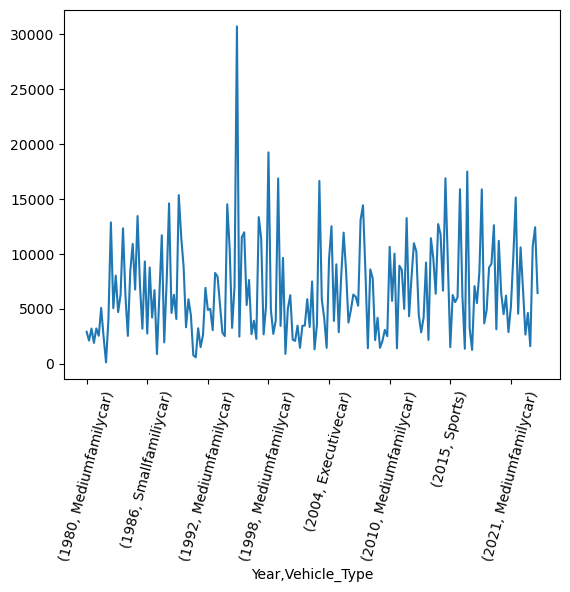

In [4]:
da=data_auto.groupby(['Year','Vehicle_Type'])['Automobile_Sales'].sum()
da.plot(kind='line')
plt.xticks(rotation=75)

### TASK 1.3: Use the functionality of **Seaborn Library** to create a visualization to compare the sales trend per vehicle type for a recession period with a non-recession period.

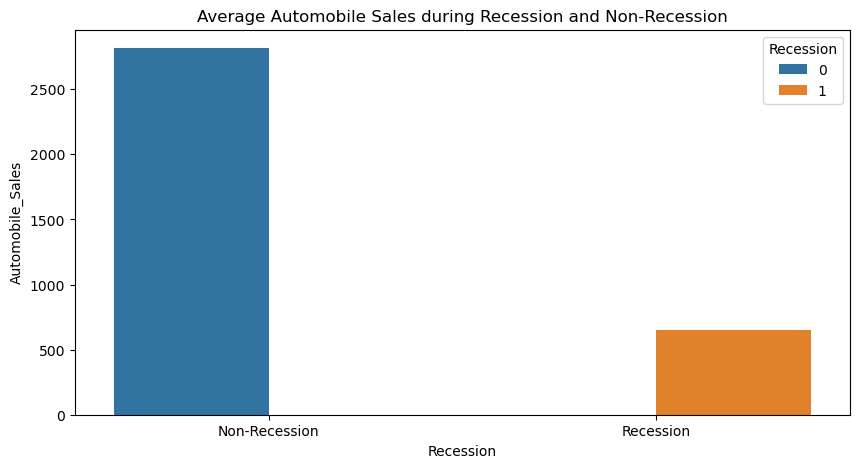

In [5]:
new_df = data_auto.groupby('Recession')['Automobile_Sales'].mean().reset_index()
new_df['Recession']=new_df['Recession'].astype(str)
    # Create the bar chart using seaborn
plt.figure(figsize=(10,5))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Recession',  data=new_df)
# plt.xlabel('............')
# plt.ylabel('...............')
plt.title('Average Automobile Sales during Recession and Non-Recession')
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.show()


<Axes: xlabel='Vehicle_Type', ylabel='Automobile_Sales'>

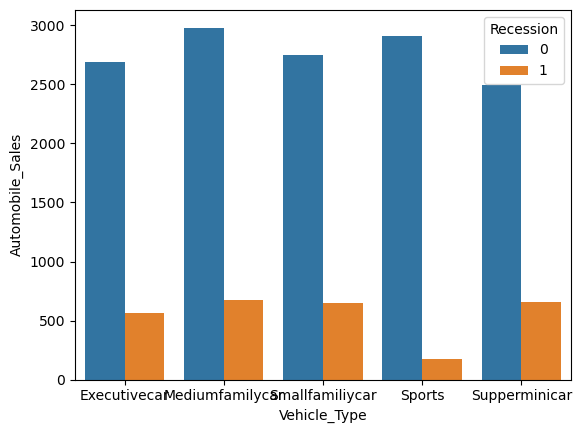

In [21]:
df=data_auto.groupby(['Recession','Vehicle_Type'])['Automobile_Sales'].mean().reset_index()
sns.barplot(df,x='Vehicle_Type',y='Automobile_Sales',hue=df['Recession'].astype(str))

# TASK 1.4: Use sub plotting to compare the variations in GDP during recession and non-recession period by developing line plots for each period.

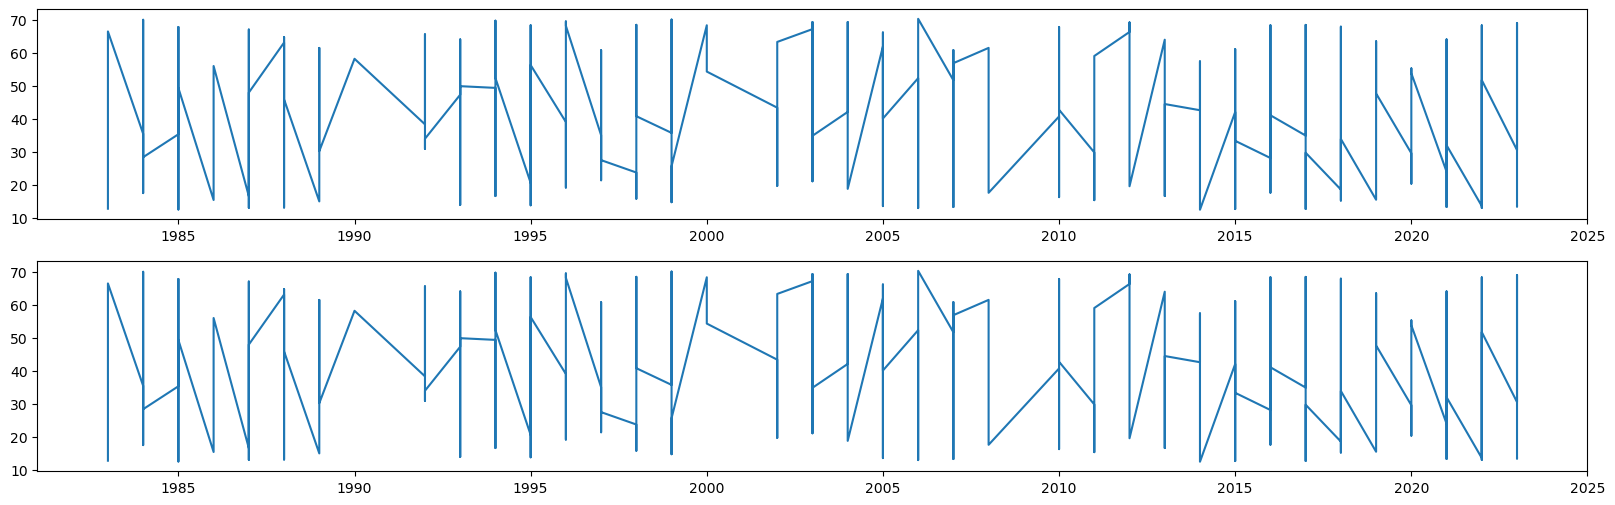

In [53]:
df=data_auto.groupby('Recession')['Growth_Rate'].mean().reset_index()
non_rec_data = data_auto[data_auto['Recession'] == 0]
rec_data=data_auto[data_auto['Recession'] == 0]
fig,ax=plt.subplots(2,1,figsize=(20,6))
ax[0].plot(rec_data['Year'], rec_data['GDP'])
ax[1].plot(rec_data['Year'], rec_data['GDP'])
# rec_data

## TASK 1.5: Develop a Bubble plot for displaying the impact of seasonality on Automobile Sales.